<a href="https://www.kaggle.com/code/sondosaabed/linear-regression-predict-roughness?scriptVersionId=183819774" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <div align=center><b> 3D Prints Roughness dataset</b></div>
<div align=center>Linear Regression pipeline for the Roughness of the 3D prints</div>

## Abstract
In this notebook, the roughness of 3D prints prodcuts is predicted as a regression task. Two experimnets were conducted one with all the features, and the other with selected features based on feature correlation analysis. The strong assumption of Linear regression is used to model the data. Other preprocessing steps are done. Both models have had exhibited the **overfitting** problem, that was decided based on the bias, variance tradeoff where both models showed high variance. And the Training performances were better than the testing performances. Finally, the weights of the models were also interpreted in terms of how they affect the target feature.

## Table of Contents

- Introduction
- Tools and Versions
- Data Analysis Process
    - Data Wrangling
    - Data preparation for modeling
        - Data splitting.
        - Feature scaling.
        - Feature selection.
- Data Modeling Processing
    - Algorithm
    - Training 
    - Testing
    - Evaluation
        - performance metrics
        - bias, variance tradeoff
- Insights and Conclusions
    
<hr>

## Introduction
Working on 3D printed pieces, could face the challenge of having to reinforce them totally or locally in order to improve their strength and durability. It could be a whole part or a specific area subjected to some kind of load, such as compression, tension, shear, torsion, or bending. [1]
The aim of the noteboook is to determine how much of the adjustment parameters in 3d printers affect the print quality, accuracy and strenght it's more of a product quality task. Where there are nine setting parameters and three measured output parameters one of which that is the targeted (Roughness)

![5l7W9Cj1eGhVgFhuIfNKzirVA2v861pZ4xIW84T4qOw](https://github.com/sondosaabed/SP.TOP-Data-Science-and-Analytics/assets/65151701/cbf8ec7f-7490-4e67-8cfb-b37ac1cf4799)

**Figure 1:** Zurikh Artificail parts [4]

In this assignment, a dataset of 3D prints roughness and other features is used. The roughness is a measure of how rough the 3D printed part is. It is the target feature for this assignment, where the roughness a numerical value that will be predicted using linear regression.

### About the dataset

This dataset comes from research by TR/Selcuk University Mechanical Engineering department.[3]

Here is the [Kaggle Link of the Dataset](https://www.kaggle.com/datasets/afumetto/3dprinter/data?select=data.csv)

The dataset contains the following features:

|Feature|Type|Description|
|-----|-----|-----|
|Layer Height (mm)| numerical| Thickness of each layer of material deposited during printing.|
| Wall Thickness (mm)| numerical| Thickness of the solid walls of the object.|
| Infill Density (%)| numerical|Percentage of the object's interior filled with material.|
| Infill Pattern ()|ordinal| The geometric pattern used to fill the interior of the object.|
| Nozzle Temperature (Cº)|numerical| Temperature of the material exiting the printer nozzle.|
| Bed Temperature (Cº)|numerical| Temperature of the printer bed where the object is laid down.|
| Print Speed (mm/s)|numerical| Speed at which the printer nozzle travels while printing.|
| Material () | nominal | The filament or material used for printing the object.|
| Fan Speed (%)|numerical| Speed of the fan cooling the printed object. Affects how quickly the material cools and solidifies. |

The target feature is: Roughness (µm) whoch is the measurement of how much the object printed is rough.

The following figure shows what is means to have diffrent types of infill patterns and diffrent types of infill densities.
![main-qimg-70b737714f100e1b57c6c22d5d60effb](https://github.com/sondosaabed/SP.TOP-Data-Science-and-Analytics/assets/65151701/0c15e3ba-431e-40c0-b0f2-21d0401ad8fe)

**Figure 2:** fill patterns in 3D printing [2]

The following figure shows what is means to have diffrent types of materials used in 3D prints:

![image](https://github.com/sondosaabed/SP.TOP-Data-Science-and-Analytics/assets/65151701/73270f3c-15bd-464e-80f9-37904260d7f3)

**Figure 3:** Material PLA vs ABS [5]

<hr>

## Tools and Versions

The following tools and versions are utiliize through this reporting:

|Tool | Version |
|-----|---------|
|Python|3.12.2|
|Numpy|1.26.4|
|Matplotlib|3.8.2|
|Pandas|2.2.1|
|Sckitlearn|1.5.0|
|Visual Studio Code |Updated|
|Git & github|[Repo.](https://github.com/sondosaabed/SP.TOP-Data-Science-and-Analytics/blob/main/Assignments/A7-3D-prints-Roughness/1190652_A7.ipynb)|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<hr>

## Data Analysis Process

### Data Wrangling

In this section, the data wrangling process is followed wehre first the dataset is loaded and it goes through assessment and cleansing. Inluding aspectes of structural probelms and outliers, duplicaes or missing values.

#### Loading the Dataset

In [2]:
def load_data(path="/kaggle/input/3dprinter/data.csv"):
    """
    Loads the csv data into the pandas data frame
    Args:
        path (string): path to the data, deafult value is the file name
    Returns:
        (pd.DataFrame): data frame contains the file data (pd.DataFrame)
    """
    df = None
    if path.endswith(".csv"):
        df = pd.read_csv(path)
    return df

In [3]:
df = load_data()
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


<hr>

#### Assessing and Cleaning the datasets
In this section the following steps will be conducted:
- Assess and handle Columns and Data types
- Assess and handle Duplicates
- Assess and handle Missing Values
-  Assess and handle Outliers

##### Assessing and handling Columns and Data types

- Since one the requiremnts is to have an ordinal feature this feature has the notion of order on it regarding the structure and the infill pattern used where the higher the rank the more complex the pattern used in the design.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [5]:
df.nunique()

layer_height           5
wall_thickness        10
infill_density         9
infill_pattern         2
nozzle_temperature     9
bed_temperature        5
print_speed            3
material               2
fan_speed              5
roughness             44
tension_strenght      26
elongation            27
dtype: int64

 for the infill_pattern categorical feature because it have the notion of order the higher means the more complex the structure is we can replace the grid = 0 and honeycomb = 1 instead of one hot encoding.

In [6]:
df.infill_pattern = [0 if each == "grid" else 1 for each in df.infill_pattern] 

for the second categorical feature which is the material it doesn't have the notion of order:

In [7]:
df.material = [0 if each == "pla" else 1 for each in df.material] 

In [8]:
df.sample(5)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
15,0.06,10,90,1,200,60,60,0,0,126,27,2.2
44,0.20,3,80,0,250,80,40,1,100,357,21,1.1
49,0.20,3,60,1,220,80,40,0,100,220,27,3.1
48,0.20,7,40,0,215,75,40,0,75,244,29,3.2
28,0.10,4,90,0,215,75,120,0,75,138,34,2.9


> Now all the dataset is numerical values.

##### Assess and handle Duplicates
Now let's check for duplicates and handle them

In [9]:
df.duplicated().any()

False

> There are no duplicates records found.

##### Assess and handle Missing Values
This is the final section of cleaning the dataset, it is about detecting and handling the missing values.

In [10]:
df.isna().sum().sort_values()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

> There are no missing records found.

##### Assess and handle Outliers
Now let's check for outliers with visualization using boxplot.

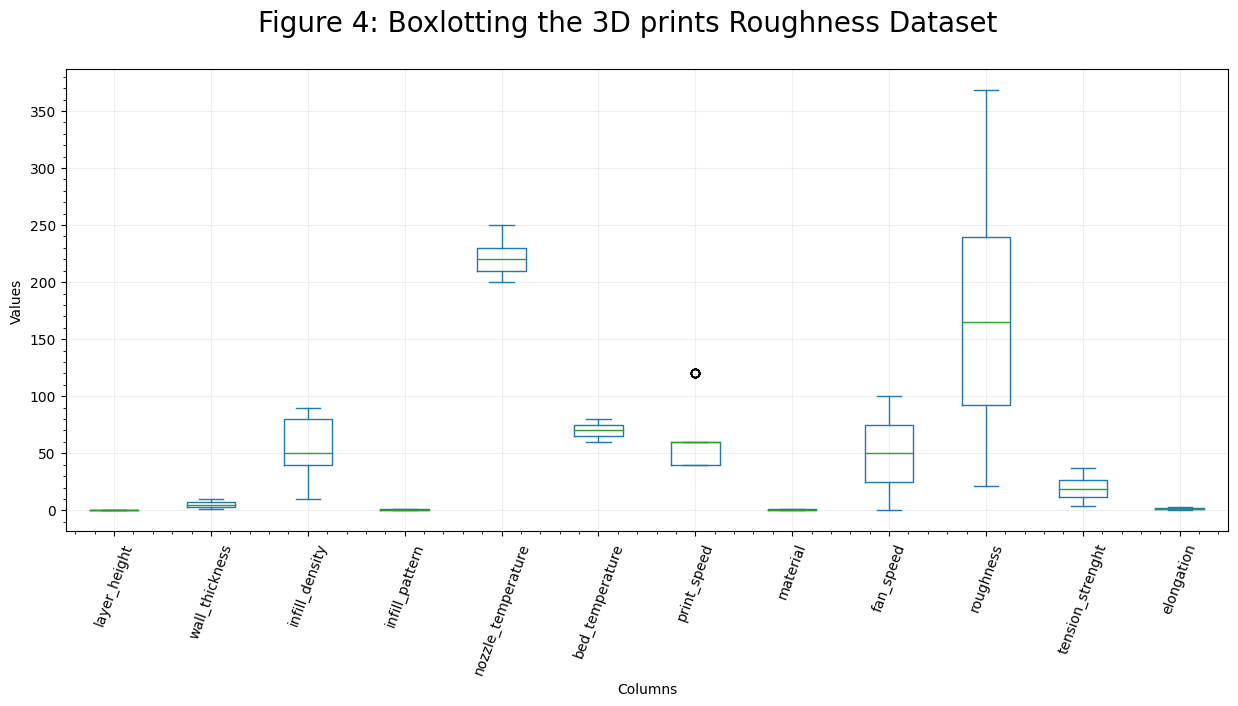

In [11]:
df.plot(kind='box',figsize=(15, 6));
plt.xlabel('Columns')  
plt.ylabel('Values') 
plt.grid(True, alpha=0.2)
plt.minorticks_on()
plt.suptitle('Figure 4: Boxlotting the 3D prints Roughness Dataset', size=20)
plt.tick_params(axis='x', rotation=70) 
plt.show()

> The print_speed has an upper bound outlier.

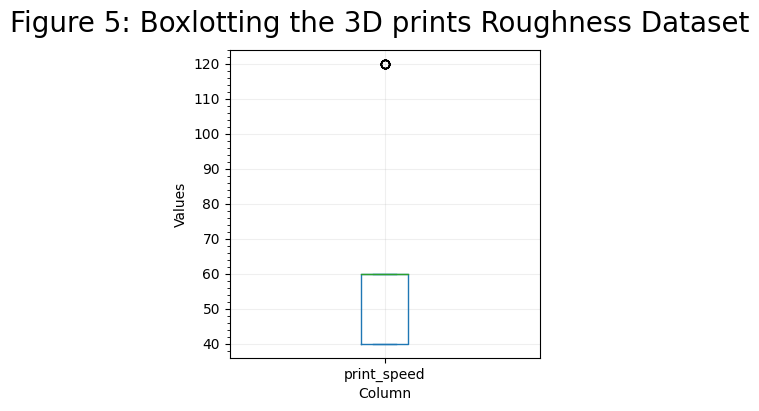

In [12]:
df['print_speed'].plot(kind='box',figsize=(4, 4));
plt.xlabel('Column')  
plt.ylabel('Values') 
plt.grid(True, alpha=0.2)
plt.minorticks_on()
plt.suptitle('Figure 5: Boxlotting the 3D prints Roughness Dataset', size=20)
plt.tick_params(axis='x') 
plt.show()

> The outlier is the record that has the speed of printing as 120, let's take a further look into the records that has that speed.

In [13]:
df[df['print_speed']== 120]

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
20,0.1,1,40,0,220,60,120,1,0,120,16,1.2
21,0.1,2,30,1,225,65,120,1,25,144,12,1.1
22,0.1,1,50,0,230,70,120,1,50,265,10,0.9
23,0.1,9,80,1,240,75,120,1,75,312,19,0.8
24,0.1,2,60,0,250,80,120,1,100,368,8,0.4
25,0.1,1,50,1,200,60,120,0,0,180,11,1.6
26,0.1,4,40,0,205,65,120,0,25,176,12,1.2
27,0.1,3,50,1,210,70,120,0,50,128,18,1.8
28,0.1,4,90,0,215,75,120,0,75,138,34,2.9
29,0.1,1,30,1,220,80,120,0,100,121,14,1.5


> There seem to be many records that have the printing speed of 120, it is decided to keep these records as a reasonable speed of printing.

## Data preparation for modeling
In this section the following steps will be conducted:
- Spliting into testing and training subsets.
- Feature scaling.
- Feature Selection and correlation.

### Feature Selection and correlation analysis
In this section the features are analyzed using the correlation matrix and the scatter plots matrix so decide which features to keep based on the target feature. 

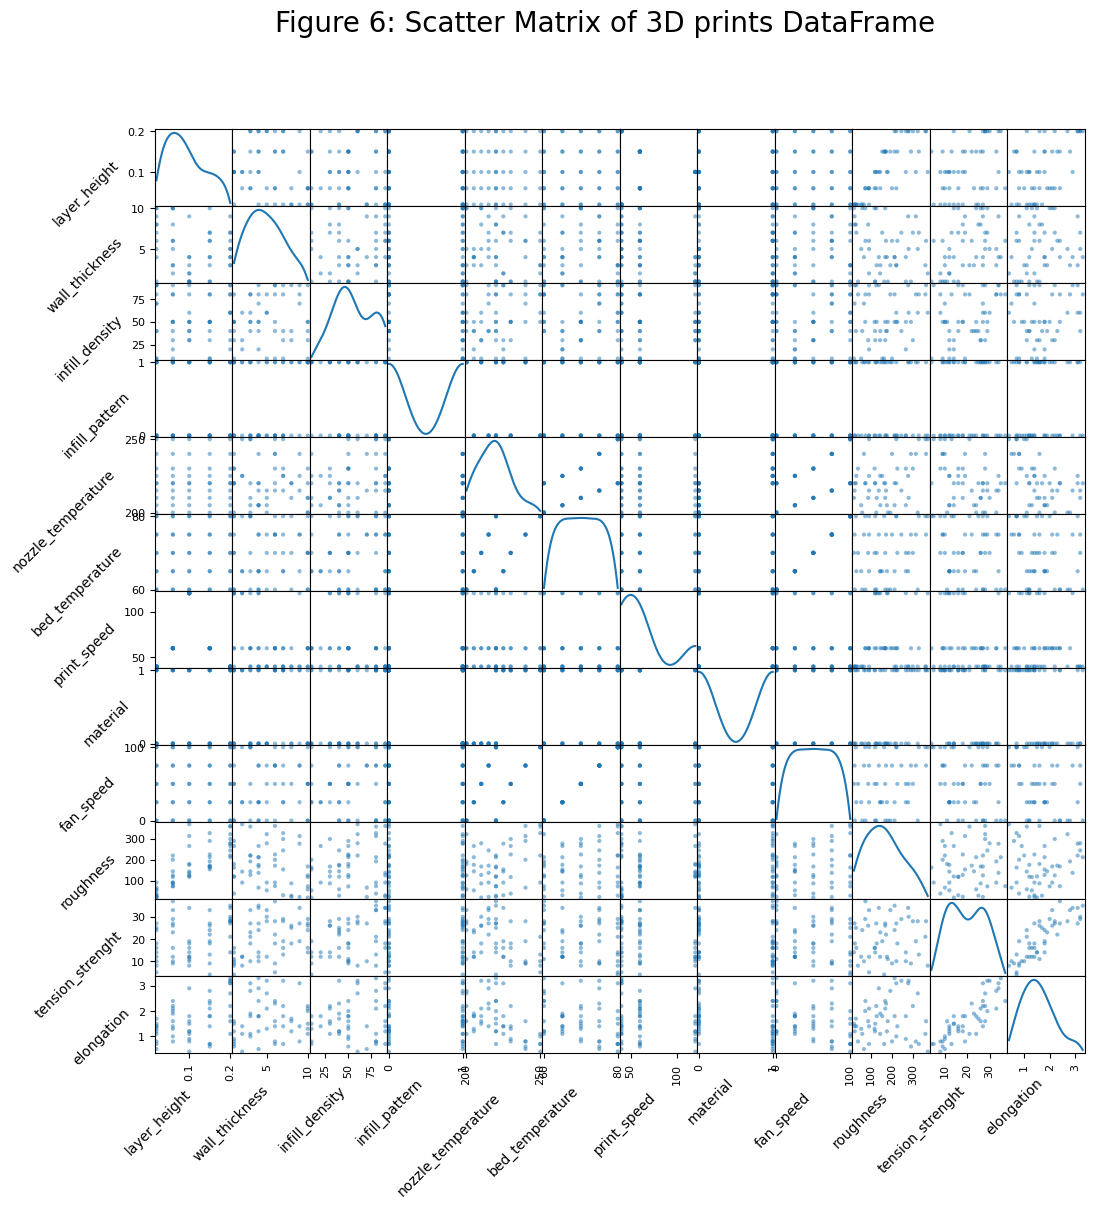

In [14]:
scatter_matrix = pd.plotting.scatter_matrix(df,  figsize=(12, 12), diagonal='kde')
plt.suptitle('Figure 6: Scatter Matrix of 3D prints DataFrame', size=20)
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right')
    ax.set_ylabel(ax.get_ylabel(), rotation=45, ha='right')

> It is noticed that the target feature scatter plots with each of the features doesn't actually show correlation, only there is a slight positive correlation with the layer_height feature, it seems to have a positive trend.

> The feature infill pattern seems to have no correlation with all of the features.

> The feature infill density have positive correlation with the three measures of roughness, tension_strength and elongation.

> Nozzel temrature shows positive trend with bed_temperature, and fan_speed feature.

> Fan_speed and bed_temperature are likely to have a very high correlation it shows a linear strong line.

> print_speed is not showing any positive or negative trends with the other features.

> tension_strength is positvly correlated with the elongation feature. and the elongantion shows also a positive trend with tension_strength.

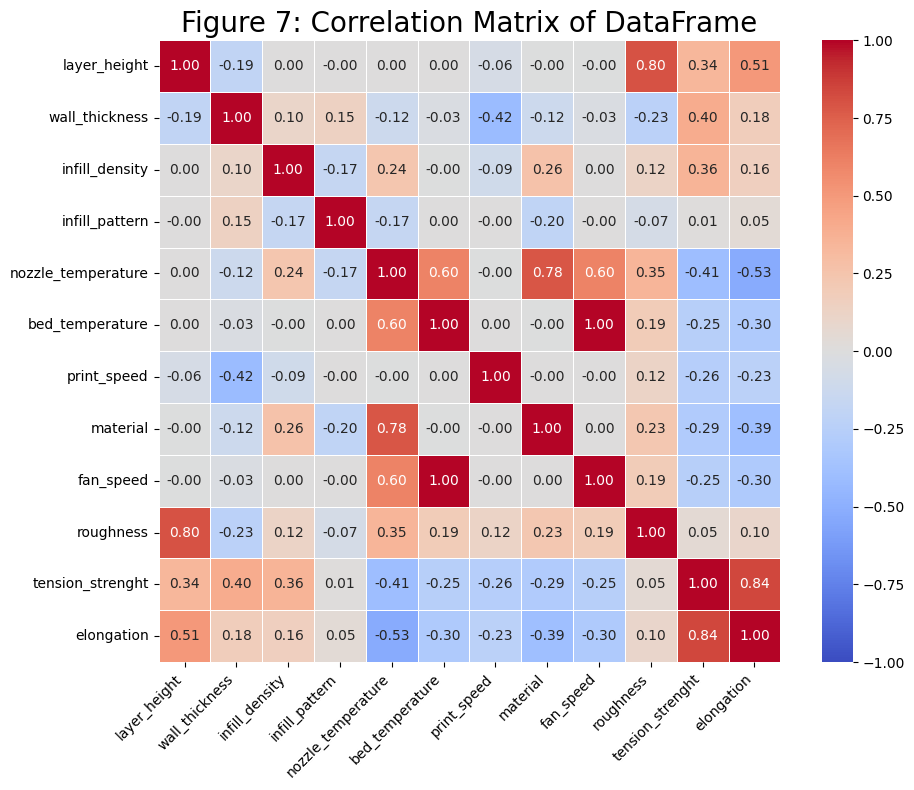

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True, linewidths=0.5, square=True)      
plt.title('Figure 7: Correlation Matrix of DataFrame', size=20)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

> It is noticed that there is a very high possitive correlation 0.8 with the layer_height and the target feature.

> There is positive low correlation with the material of abd and negative correlation with the material of pla and the target feature.

> There is a very low almost zero correlation with tension_strength and the target feature. And a very low almost zero correlation but negative with the infill_pattern feature.

> the decision is to drop the infill_pattern feature and tension_strength feature in the first experiment.

In [16]:
selected_features = set(df.columns) - set(['roughness','infill_pattern', 'tension_strength','elongation'])
selected_features = list(selected_features)
selected_features

['tension_strenght',
 'layer_height',
 'bed_temperature',
 'wall_thickness',
 'infill_density',
 'print_speed',
 'material',
 'nozzle_temperature',
 'fan_speed']

### Dataset Splitting
The splitting rule used is the 80:20 split train:test.

There will be two modeling experminets, one with all features and the otehr with only the selected features based on the previous section:

In [17]:
y = df['roughness']
display(y.head())

0    25
1    32
2    40
3    68
4    92
Name: roughness, dtype: int64

> Selected Features

In [18]:
X_1 = df[selected_features]
display(X_1.head())

,tension_strenght,layer_height,bed_temperature,wall_thickness,infill_density,print_speed,material,nozzle_temperature,fan_speed
0,18,0.02,60,8,90,40,1,220,0
1,16,0.02,65,7,90,40,1,225,25
2,8,0.02,70,1,80,40,1,230,50
3,10,0.02,75,4,70,40,1,240,75
4,5,0.02,80,6,90,40,1,250,100


> All Features

In [19]:
X_2 = df.drop(columns=['roughness'])
display(X_2.head())

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,1,0,18,1.2
1,0.02,7,90,1,225,65,40,1,25,16,1.4
2,0.02,1,80,0,230,70,40,1,50,8,0.8
3,0.02,4,70,1,240,75,40,1,75,10,0.5
4,0.02,6,90,0,250,80,40,1,100,5,0.7


> Splitting with 80:20 rule:

In [20]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, shuffle=True, test_size=0.2, random_state=1190652)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, shuffle=True, test_size=0.2, random_state=1190652)

### Feature scaling
Since numerical outliers were detected, the feature scaling will be performed using the standard scaler. 

In [21]:
X_train_1.describe().T

,count,mean,std,min,25%,50%,75%,max
tension_strenght,40.0,20.20000,8.497964,4.00,12.75,20.0,27.00,37.0
layer_height,40.0,0.10275,0.065554,0.02,0.06,0.1,0.15,0.2
bed_temperature,40.0,70.12500,7.024454,60.00,65.00,70.0,75.00,80.0
wall_thickness,40.0,5.50000,2.855494,1.00,3.00,5.0,8.00,10.0
infill_density,40.0,53.00000,26.428423,10.00,30.00,50.0,80.00,90.0
print_speed,40.0,63.50000,30.004273,40.00,40.00,60.0,60.00,120.0
material,40.0,0.45000,0.503831,0.00,0.00,0.0,1.00,1.0
nozzle_temperature,40.0,220.62500,15.114414,200.00,210.00,220.0,230.00,250.0
fan_speed,40.0,50.62500,35.122268,0.00,25.00,50.0,75.00,100.0


In [22]:
X_train_2.describe().T

,count,mean,std,min,25%,50%,75%,max
layer_height,40.0,0.10275,0.065554,0.02,0.06,0.1,0.150,0.2
wall_thickness,40.0,5.50000,2.855494,1.00,3.00,5.0,8.000,10.0
infill_density,40.0,53.00000,26.428423,10.00,30.00,50.0,80.000,90.0
infill_pattern,40.0,0.52500,0.505736,0.00,0.00,1.0,1.000,1.0
nozzle_temperature,40.0,220.62500,15.114414,200.00,210.00,220.0,230.000,250.0
bed_temperature,40.0,70.12500,7.024454,60.00,65.00,70.0,75.000,80.0
print_speed,40.0,63.50000,30.004273,40.00,40.00,60.0,60.000,120.0
material,40.0,0.45000,0.503831,0.00,0.00,0.0,1.000,1.0
fan_speed,40.0,50.62500,35.122268,0.00,25.00,50.0,75.000,100.0
tension_strenght,40.0,20.20000,8.497964,4.00,12.75,20.0,27.000,37.0


> Looking at the maximum and minimum values or the range of each of the numerical feature, the data contains diffrent scales of features so the decision is to make the step of feature scaling.

> only the selected features:

In [23]:
scaler_1 = StandardScaler()
X_train_scaled_1 = pd.DataFrame(scaler_1.fit_transform(X_train_1),  columns=X_train_1.columns)
X_test_scaled_1 = pd.DataFrame(scaler_1.transform(X_test_1), columns=X_test_1.columns)
display(X_train_scaled_1.sample(5))
display(X_train_scaled_1.describe().T)

,tension_strenght,layer_height,bed_temperature,wall_thickness,infill_density,print_speed,material,nozzle_temperature,fan_speed
32,-0.143009,0.729958,-0.738889,0.531995,-1.647764,-0.118136,1.105542,0.293146,-0.738889
13,-1.215578,-1.278393,0.702845,-0.531995,0.651441,-0.793200,1.105542,1.298219,0.702845
22,0.929560,1.502401,-1.459756,-0.177332,0.268241,-0.793200,-0.904534,-1.381975,-1.459756
36,-1.453927,-1.278393,-0.018022,-1.595986,1.034642,-0.793200,1.105542,0.628171,-0.018022
30,1.644606,1.502401,-0.738889,1.241322,1.417843,-0.793200,1.105542,0.293146,-0.738889


,count,mean,std,min,25%,50%,75%,max
tension_strenght,40.0,1.332268e-16,1.012739,-1.930625,-0.887849,-0.023835,0.810386,2.002129
layer_height,40.0,-9.992007e-17,1.012739,-1.278393,-0.660438,-0.042484,0.729958,1.502401
bed_temperature,40.0,-5.551115e-18,1.012739,-1.459756,-0.738889,-0.018022,0.702845,1.423712
wall_thickness,40.0,0.000000e+00,1.012739,-1.595986,-0.886659,-0.177332,0.886659,1.595986
infill_density,40.0,4.440892e-17,1.012739,-1.647764,-0.881362,-0.114960,1.034642,1.417843
print_speed,40.0,-4.440892e-17,1.012739,-0.793200,-0.793200,-0.118136,-0.118136,1.907054
material,40.0,2.220446e-17,1.012739,-0.904534,-0.904534,-0.904534,1.105542,1.105542
nozzle_temperature,40.0,0.000000e+00,1.012739,-1.381975,-0.711927,-0.041878,0.628171,1.968268
fan_speed,40.0,-5.551115e-18,1.012739,-1.459756,-0.738889,-0.018022,0.702845,1.423712


> All features:

In [24]:
scaler_2 = StandardScaler()
X_train_scaled_2 = pd.DataFrame(scaler_2.fit_transform(X_train_2), columns=X_train_2.columns)
X_test_scaled_2 = pd.DataFrame(scaler_2.transform(X_test_2), columns=X_test_2.columns)
display(X_train_scaled_2.sample(5))
display(X_train_scaled_2.describe().T)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,tension_strenght,elongation
32,0.729958,0.531995,-1.647764,0.951190,0.293146,-0.738889,-0.118136,1.105542,-0.738889,-0.143009,0.203571
15,-0.660438,-0.886659,-0.498161,-1.051315,-1.046951,-0.738889,-0.118136,-0.904534,-0.738889,0.333688,0.341584
28,-0.042484,-0.531995,1.417843,-1.051315,-0.376902,0.702845,1.907054,-0.904534,0.702845,1.644606,1.721724
6,-0.042484,-1.595986,-0.881362,0.951190,-0.041878,1.423712,1.907054,-0.904534,1.423712,-0.738881,-0.210471
20,1.502401,0.531995,-0.881362,-1.051315,0.628171,-0.018022,-0.793200,1.105542,-0.018022,0.929560,0.755626


,count,mean,std,min,25%,50%,75%,max
layer_height,40.0,-9.992007e-17,1.012739,-1.278393,-0.660438,-0.042484,0.729958,1.502401
wall_thickness,40.0,0.000000e+00,1.012739,-1.595986,-0.886659,-0.177332,0.886659,1.595986
infill_density,40.0,4.440892e-17,1.012739,-1.647764,-0.881362,-0.114960,1.034642,1.417843
infill_pattern,40.0,-3.885781e-17,1.012739,-1.051315,-1.051315,0.951190,0.951190,0.951190
nozzle_temperature,40.0,0.000000e+00,1.012739,-1.381975,-0.711927,-0.041878,0.628171,1.968268
bed_temperature,40.0,-5.551115e-18,1.012739,-1.459756,-0.738889,-0.018022,0.702845,1.423712
print_speed,40.0,-4.440892e-17,1.012739,-0.793200,-0.793200,-0.118136,-0.118136,1.907054
material,40.0,2.220446e-17,1.012739,-0.904534,-0.904534,-0.904534,1.105542,1.105542
fan_speed,40.0,-5.551115e-18,1.012739,-1.459756,-0.738889,-0.018022,0.702845,1.423712
tension_strenght,40.0,1.332268e-16,1.012739,-1.930625,-0.887849,-0.023835,0.810386,2.002129


> Now looking at the ranges and the minimum and maximum values they are all in the same scale of values. For both with the selcetd and all the features:

## Data Modeling Process
in this section, two linear regression models are trained. Once with all the features and the second one with only the selected features based on the correlation between the features and the target. 

### Linear Regression models
Let's creat the linear regression object model for the algorithms.

In [25]:
## For Selected Features
LRM1 = LinearRegression() 
LRM1

LinearRegression()

In [26]:
## For All Features
LRM2 = LinearRegression() 
LRM2

LinearRegression()

### Model Training
now let's fit each model to the specific data subsets.

In [27]:
history1 = LRM1.fit(X_train_scaled_1, y_train_1)
history2 = LRM2.fit(X_train_scaled_2, y_train_2)

### Model's wights
After training both models, we are able to get the weights and take a look into them, also obtain the linear equation.

In [28]:
def print_equation(history):
    """
    A function that prints the model weights in equations.
    Args:
        history(sckit.LinearRegression): fitted model
    Returns:
        nothing
    """ 
    equation_terms = [f"{coef:.3f} * {feat}\n" for coef, feat in zip(history.coef_, history.feature_names_in_)]
    linear_equation = " + ".join(equation_terms)
    full_equation = f"y = {history.intercept_:.3f} + {linear_equation}"
    print(full_equation)

In [29]:
print_equation(history1)

y = 168.100 + -2.172 * tension_strenght
 + 81.673 * layer_height
 + -69.779 * bed_temperature
 + 8.034 * wall_thickness
 + 3.101 * infill_density
 + 14.556 * print_speed
 + -185.689 * material
 + 270.558 * nozzle_temperature
 + -69.779 * fan_speed



> It seems that the highest weight was assigned to the nozzle_temperature feature, and the lowest was assigned to the material feature. That means that the higher the nozeel_temperature feature is the higher the roughness of the 3D prints.

Here is a comprehensive interpretation of each of the coefficients:

> **Positive Coefficients:** 

- **Nozzle_temperature (270.558):** Higher nozzle temperature has the strongest positive impact on the target variable 
- **Layer_height (81.673):** Increased layer height has the strongest positive impact after nozzle temperature.
- **Print_speed (14.556):** Higher print speed has a positive effect. 

> **Postovive but weaker Coefficients:** 

- **Wall_thickness (8.034):** Thicker walls contribute positively. 
- **Infill_density (3.101):** Increased infill density has a positive influence. 
- **Tension_strenght (1.096):** A positive influence, but likely weaker than other positive.

> **Negative Coefficients:** 

- **Material (-185.689):** The material has a negative impact, but the specific interpretation depends on how the material is coded (e.g., higher value might represent a stronger material with a negative effect on the target variable).
- **Bed_temperature (-69.779):** Higher bed temperature has a negative influence.
- **Fan_speed (-69.779):** Increased fan speed has a negative effect.

> **Negative but weaker Coefficients:**

- **Infill_pattern (-0.630):** The infill pattern has a negative influence, but the magnitude is small compared to other terms.
- **Elongation (-5.509):** Negative influence, but likely weaker than other negative terms.

In [30]:
print_equation(history2)

y = 168.100 + 83.515 * layer_height
 + 7.581 * wall_thickness
 + 3.185 * infill_density
 + -0.630 * infill_pattern
 + 261.941 * nozzle_temperature
 + -67.805 * bed_temperature
 + 14.419 * print_speed
 + -180.493 * material
 + -67.805 * fan_speed
 + 1.096 * tension_strenght
 + -5.509 * elongation



> In the second model teh highest weight was also assigned to the nozzle_temperature feature, and the lowest was assigned to the material feature. 

Here is a comprehensive interpretation of each of the coefficients:

> **Positive Coefficients:** 

- **Nozzle_temperature (261.941):** Similar to model 1, nozzle temperature has the strongest positive effect.
- **Layer_height (83.515):** Strongest positive influence after nozzle temperature, similar to model 1.

> **Postovive but weaker Coefficients:** 

- **Print_speed (14.419):** Positive effect similar to model 1.
- **Wall_thickness (7.581):** Positive impact, but weaker than in model 1.
- **Infill_density (3.185):** Positive influence on the target variable.
- **Tension_strenght (1.096):** Positive influence, likely weak.

> **Negative Coefficients:** 
- **Material (-180.493):** Similar to model 1, material has a negative impact.
- **Bed_temperature (-67.805):** Negative influence on the target variable.
- **Fan_speed (-67.805):** Negative effect, similar to model 1.

> **Negative but weaker Coefficients:**
- **Infill_pattern (-0.630):** Small negative influence.
- **Elongation (-5.509):** Negative impact, likely weak.

### Model Testing
Here we use the trained model to pridict new data of testing, and then also use it to prdict the training data itself.

In [31]:
## on testing
y_pred_1 = LRM1.predict(X_test_scaled_1)
y_pred_2 = LRM2.predict(X_test_scaled_2)

In [32]:
## On training
y_pred_t_1 = LRM1.predict(X_train_scaled_1)
y_pred_t_2 = LRM2.predict(X_train_scaled_2)

### Model Evaluation
The evaluation section includes plotting a curve and printing the regression metrics, these will be printed and shown for both training and testing and for the two models:
- score
- mean_absolute_error
- mean_squared_error
- root_mean_squared_error
- r2_score

In [33]:
def print_regression_metrics(y_true, y_pred, label=''):
    """
    This function prints the regression metrics performance
    Args:
        y_true  (array): the target features that are true (y true)
        y_pred (array): the predictions of the model. (y^ hat)
        label (str): The label to print
    Returns:
        Nothing but prints regression metrics
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False) 
    r_squared = r2_score(y_true, y_pred)
    
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")

- Plotting the curve

In [34]:
def plot_curve(y_test_1, y_pred_1, label=""):
    """
    A function that plots the actual values against how it was predicted with the perfect line fit.
    Args:
        y_test_1 (array): the target features of test values
        y_pred_1 (array): the predicted values 
        label (str): The label to be ptinted
    Returns:
        Nothing
    """
    _, axes = plt.subplots(figsize=(10, 6))
    axes.scatter(y_test_1, y_pred_1, color='green')
    axes.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], color='black', linewidth=2, label='Ideal Line')
    y_test_1 = np.array(y_test_1)
    y_pred_1 = np.array(y_pred_1)
    for i in range(len(y_test_1)):
        axes.plot([y_test_1[i], y_test_1[i]], [y_test_1[i], y_pred_1[i]], color='red')
    plt.suptitle(label, size=20)
    axes.set_xlabel('Actual Roughness values')
    axes.set_ylabel('Predicted Roughness values')
    axes.grid(visible=False)

- Let's look into the range of the target feature to help in interpreting the errors that we will print next.

In [35]:
df['roughness'].describe()

count     50.000000
mean     170.580000
std       99.034129
min       21.000000
25%       92.000000
50%      165.500000
75%      239.250000
max      368.000000
Name: roughness, dtype: float64

> So the range of the target feature is between 21 and 368 roughness degree.

#### LR Model 1: (Selcted Features) evaluation
Let's evaluate the first model that uses the selected features only.

##### Performance on training

LR Model 1 Score on train:  0.9183382547981154
------------------------------------------------------------
Regression Metrics:  For Model 1 Training (Selected features)
------------------------------------------------------------
- MAE = 23.791
- MSE = 862.825
- RMSE = 29.374
- R^2 = 0.918


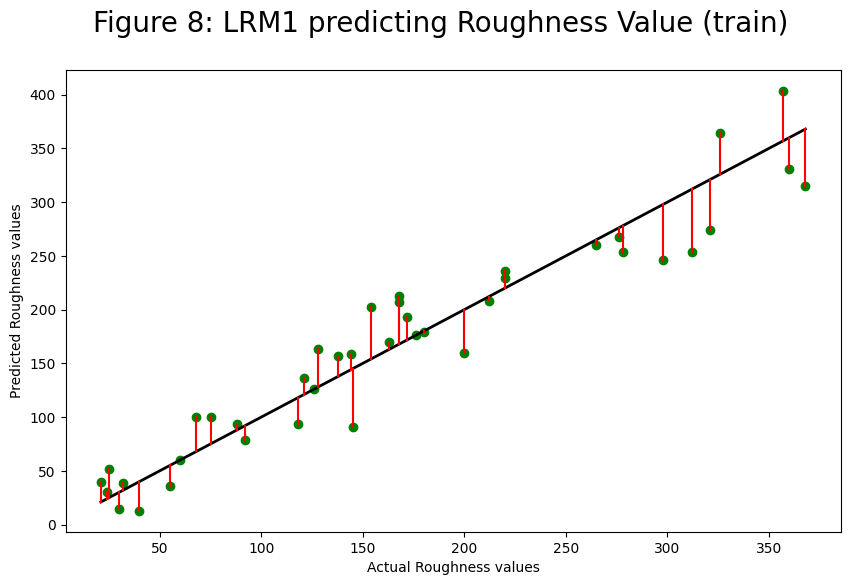

In [36]:
## Model 1 performance on train
print("LR Model 1 Score on train: ", LRM1.score(X_train_scaled_1,y_train_1))
print_regression_metrics(y_train_1, y_pred_t_1, label=' For Model 1 Training (Selected features)')
## plot the curve
plot_curve(y_train_1, y_pred_t_1, label='Figure 8: LRM1 predicting Roughness Value (train)')

> Model 1 performance which uses the selected features has perfored very good on the training dataset, wih reasonable errors. The **score reached 91.8%** which is high.

> For the metrics such **MAE = 23.791** is a good error,  seems to have a high **MSE = 862.825** and a good **RMSE = 29.374**. Finnaly the **R^2 = 0.918** which is good too.

> For the curve plotted it shows that there is a good risduals distance between the actual values and the pridcted values, where the pridcted values are so close to the actual values.

##### Performance on testing


LR Model 1 Score on test:  0.4685864035861431
------------------------------------------------------------
Regression Metrics:  For Model 1 Testing (Selected features)
------------------------------------------------------------
- MAE = 41.461
- MSE = 3,013.992
- RMSE = 54.900
- R^2 = 0.469


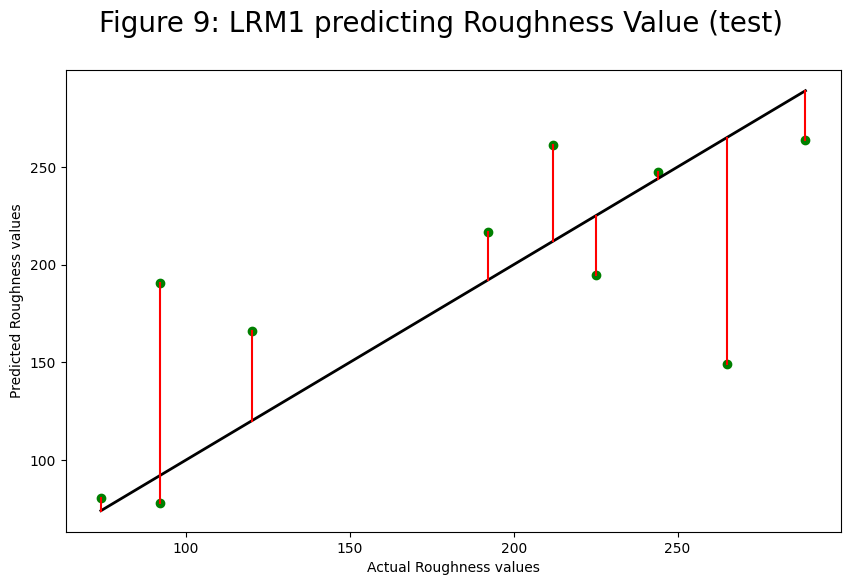

In [37]:
## Model 1 performance on test
print("\nLR Model 1 Score on test: ", LRM1.score(X_test_scaled_1,y_test_1))
print_regression_metrics(y_test_1, y_pred_1, label=' For Model 1 Testing (Selected features)')

## plot the curve
plot_curve(y_test_1, y_pred_1, label='Figure 9: LRM1 predicting Roughness Value (test)')

> Performance metrics are lower, first the score of the model is 46.8% which is relativly bad fit for the data.

> Looking at the errors: **MAE is 41.461** which is double the MAE on train that is high. Now the **MSE = 3,013.992** it is very high, meaning the performance on test is worse. Now for the **RMSE = 54.900** also the double of the train RMSE. Finnalt the **R^2 = 0.469** measure is relativly worse.

> It is noticed that we have at least two points that are way off from the actual values of the, two poitns predicted are very close almost equal to the actual values and the rest of the points have a reasonanle error.

##### Variance bias tradeoff
- Now that both the training, and testing performance is shown for the selceted features it is time to interpret and compare them in terms of the vraiance bias tradeoff and check if the model is overfitting , underfitting or good fitting.

> This model has a **High Variance** that is because of lower training error but have higher testing error.  
> This indicates an **overfitting**, the model is failing to generalize on most of the test new data.

#### LR Model 2: (All Features) evaluation

##### Performance on training

LR Model 2 Score on train:  0.9188614732762388
------------------------------------------------------------
Regression Metrics:  For Model 2 Training (All features)
------------------------------------------------------------
- MAE = 23.792
- MSE = 857.297
- RMSE = 29.280
- R^2 = 0.919


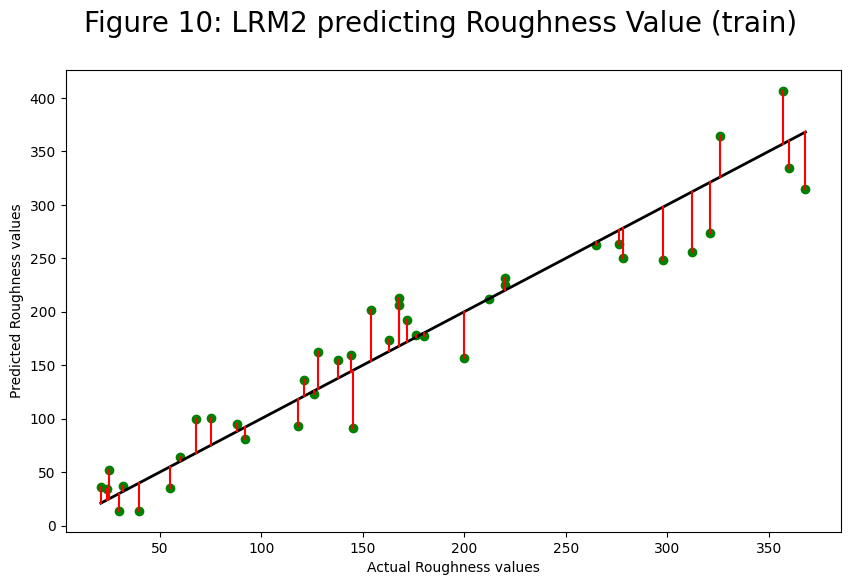

In [38]:
## Model 2 performance on train
print("LR Model 2 Score on train: ", LRM2.score(X_train_scaled_2, y_train_2))
print_regression_metrics(y_train_2, y_pred_t_2, label=' For Model 2 Training (All features)')

## plot curve
plot_curve(y_train_2, y_pred_t_2, label='Figure 10: LRM2 predicting Roughness Value (train)')

> The second model has also performed very well on the trainng dataset it's learning and **the score reached 91.9%**.

> For the other performance metrics **MAE = 23.791** is a good error,  seems to have a high **MSE = 857.297** and a good **RMSE = 29.280**. Finnaly the **R^2 = 0.919** which is good too. These metrics are very close to the first model.

> For the curve plotted it shows that there is a good risduals distance between the actual values and the pridcted values, where the pridcted values are so close to the actual values.

##### Performance on testing


LR Model 2 Score on test:  0.5048396781725519
------------------------------------------------------------
Regression Metrics:  For Model 2 Testing (All features)
------------------------------------------------------------
- MAE = 39.798
- MSE = 2,808.376
- RMSE = 52.994
- R^2 = 0.505


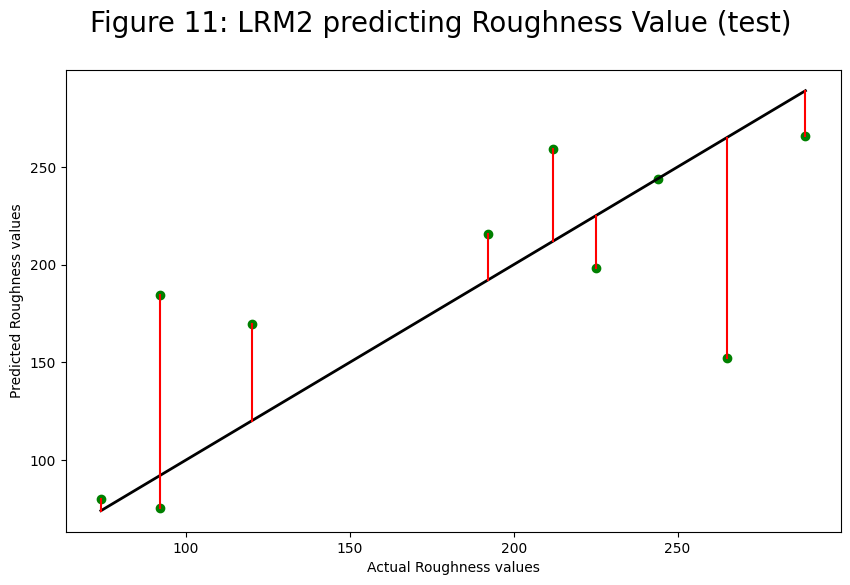

In [39]:
## Model 2 performance on test
print("\nLR Model 2 Score on test: ", LRM2.score(X_test_scaled_2,y_test_2))
print_regression_metrics(y_test_2, y_pred_2, label=' For Model 2 Testing (All features)')

## plot curve
plot_curve(y_test_2, y_pred_2, label='Figure 11: LRM2 predicting Roughness Value (test)')

> Performance metrics are noticably lower, the score of the model is 50.5% which is relativly bad fit for the data, but still better than the test on the selcted features performance it is higher.

> Looking at the errors: **MAE is 39.798** which is higher than the MAE on train and lower than the first model. Now the **MSE = 2,808.376** it is very high, meaning the performance on test is worse than the training, but it is better than the first model. Now for the **RMSE = 52.994** also the double of the train RMSE. Finnalt the **R^2 = 0.505** measure is worse than on training but higher than the first model.

> It is noticed that we have at least two points that are way off from the actual values of the, two poitns predicted are very close almost equal to the actual values and the rest of the points have a reasonanle error.

##### Variance bias tradeoff
- Now that both the training, and testing performance is shown for all the features it is time to interpret and compare them in terms of the vraiance bias tradeoff and check if the model is overfitting , underfitting or good fitting.

> This second model also has a **High Variance** that is because of lower training error but have higher testing error.  
> This indicates an **overfitting** too, the model is failing to generalize on most of the test new data.
> But it's slightly better than the first model.

## Insights and conclusions
This is the final section, were the experiments results are sumerised and conclusions are made.

The follwing table shows the summary of performance for both models on training and testing:

**Table 1:** Models performance summary

|Model |Subset| Features |Score| MAE| MSE | RMSE | R Squared|
|------|------|-----------|------|----|-----|-----|-------|
|LRM2 |Train |All features | 0.919 | 23.792 | 857.297 | 29.280 | 0.919|
|LRM2 |Test |All features | 0.505 | 39.798 | 2,808.376 | 52.994 | 0.505|
|LRM1 |Train |Selected features | 0.918 | 23.791 | 862.825 | 29.374 | 0.918|
|LRM1 |Test |Selected features | 0.469 | 41.461 | 3,013.992 | 54.900 | 0.469|

> Both models have had exhibited the **overfitting** problem, that was decided based on the bias, variance tradeoff where both models showed high variance. And the Training performances were better than the testing performances. 

> It is worth mentionining, that the model trained using all features exhibited slightly better performance than the model trained using the selcted features based on the correlation analysis.

> The wights that were obtained in training could also be utilized to better feature selection.

## Refrences
- [1] https://the3dbros.com/3d-print-infill-patterns-explained/
- [2] https://3dsolved.com/how-to-make-stronger-3d-prints-step-by-step-guide/
- [3] https://www.kaggle.com/datasets/afumetto/3dprinter/data?select=data.csv
- [4] https://www.weforum.org/agenda/2023/11/robotics-3d-printing-smartphones-space-technology-november/
- [5] https://3d2go.com.ph/blog/abs-vs-pla-filaments/
- [6] https://medium.com/@ahmet17/makina-m%C3%BChendisleri-i%C3%A7in-derin-%C3%B6%C4%9Frenme-3d-printer-veri-setinin-i%CC%87ncelenmesi-6fe1f48e0cdb